<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Amir Hossein Yari

**Student ID**: 99102507

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [21]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
# read train data file
train_data = np.load("q2-train.npy")
X_train = train_data[:, 0]
Y_train = train_data[:, 1]

# read test data file
test_data = np.load("q2-test.npy")
X_test = test_data[:, 0]
Y_test = test_data[:, 1]

# read validation data file
validation_data = np.load("q2-valid.npy")
X_val = validation_data[:, 0]
Y_val = validation_data[:, 1]
### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [22]:
def create_matrix(X,k):
  '''
  X: an m by 1 array 
  '''
  new_X = None
  ### START CODE HERE ###
  m = len(X)
  new_X = np.zeros((m, k+1))
  for i in range(m):
        for j in range(k+1):
            new_X[i, j] = X[i] ** j
  ### END CODE HERE ###
  return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [23]:
# If you need any other function for training write it here
# (like gradient descent or anything else)
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###]
  loss = np.mean((X @ w - Y)**2)
  ### END CODE HERE ###
  return loss

def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  ### START CODE HERE ###
  w = np.linalg.pinv(X) @ Y
  ### END CODE HERE ###
  return w

In [24]:
def train(X_train, Y_train, X_val, Y_val, k):
  '''
  X_train: an m_train by 1 vector contains training points
  Y_train: an m_train by 1 vector contains training values
  X_val: an m_val by 1 vector contains validation points
  Y_val: an m_val by 1 vector contains validation values
  k: degree of polynomial
  '''
  w, loss_train, loss_val = None, None, None
  ### START CODE HERE ###
  X_train = create_matrix(X_train, k)
  X_val = create_matrix(X_val, k)
  
  w = direct_method(X_train,Y_train)
  loss_train = loss(X_train,Y_train,w)
  loss_val = loss(X_val,Y_val,w)
  ### END CODE HERE ###
  return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: 
The choice of `k` can affect the balance between underfitting and overfitting. When `k` is too low, the model may not have enough flexibility to capture the underlying patterns in the data. This leads to underfitting, and the model may have high bias and poor performance on both the training and test data. On the other hand, when `k` is too high, the model can fit the training data extremely well but may fail to generalize to unseen data, resulting in overfitting.$\\$
The figure below confirms the truth of the said words.

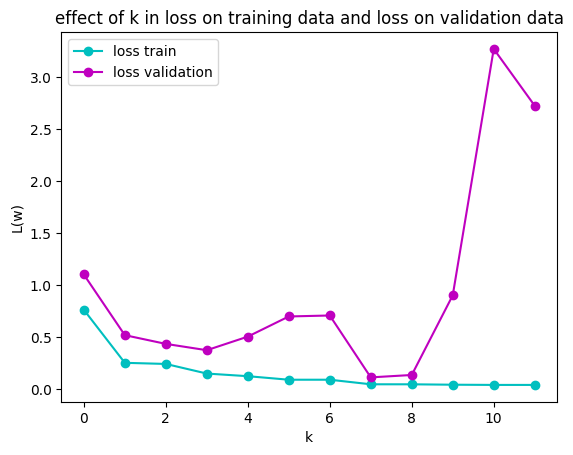

In [25]:
### START CODE HERE ###
k = 12
loss_train = np.zeros(k)
loss_val = np.zeros(k)
for i in range(k):
    w,loss_train[i],loss_val[i] = train(X_train,Y_train,X_val,Y_val,i+1)

# plotting
plt.figure()
plt.plot(np.arange(k),loss_train,"co-",label="loss train")
plt.plot(np.arange(k),loss_val,"mo-",label="loss validation")
plt.xlabel("k")
plt.ylabel("L(w)")
plt.title("effect of k in loss on training data and loss on validation data")
plt.legend()
plt.show()
### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**:
The primary purpose of a test set is to assess the performance and generalization ability of a trained model. By evaluating the model on unseen data, we can gain insights into how well the model is likely to perform in real world scenarios. This evaluation helps us understand if the model has learned meaningful patterns from the training data or if it is overfitting and performing poorly on new examples.

In [28]:
### START CODE HERE ###
w,loss_train,loss_test = train(X_train,Y_train,X_test,Y_test,8)
print("According to the previous part k = 8. So loss on test data for (k = 8) = ", loss_test)
### END CODE HERE ###

According to the previous part k = 8. So loss on test data for (k = 8) =  0.11791424797244576
